In [1]:
path = 'C:/Users/Marie/Desktop/Bike Sharing'

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from os import listdir
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None

In [25]:
print(listdir(path + '/Full Data/Cleaned Data'))

['full_daily_data.csv', 'full_data.csv', 'full_hourly_data.csv', 'holidays.csv', 'hourly_full_data.csv', 'log.txt', 'log_year.txt', 'stations.csv', 'Weather Data']


In [26]:
data_day = pd.read_csv(path + '/Full Data/Cleaned Data/full_data.csv')

In [27]:
data_day.head()

,index,max_temp,min_temp,wind_speed,wind_temp,rain,hum,visibility,clouds,chaleur_index,...,avg_temp,string_date,year,month,day,wkday,casual,registered,cnt,atemp
0,2010-09-15,29.0,17.0,2.222222,17.0,0.0,0.72,10.000,7.0,29.0,...,23.0,2010/09/15,2010,9,15,2,1,0,1,24.857298
1,2010-09-16,31.0,17.0,4.444444,17.0,1.0,0.93,8.750,46.0,31.0,...,24.0,2010/09/16,2010,9,16,3,1,0,1,25.682249
2,2010-09-17,25.0,18.0,4.166667,18.0,2.0,0.95,9.625,24.0,26.0,...,21.5,2010/09/17,2010,9,17,4,2,7,9,22.907163
3,2010-09-19,29.0,16.0,1.388889,16.0,NaN,0.80,10.000,10.0,29.0,...,22.5,2010/09/19,2010,9,19,6,1,10,11,24.522850
4,2010-09-20,25.0,16.0,5.000000,16.0,NaN,0.83,10.000,10.0,25.0,...,20.5,2010/09/20,2010,9,20,0,34,204,238,21.666882


In [91]:
def plot_aggregated_data(feature, n_dec = 0):
    agg_data = data_day[['casual', 'registered', feature]]
    agg_data[feature] = agg_data[feature].apply(lambda x: round(x,n_dec))
    agg_data = agg_data.groupby(feature).mean().reset_index()

    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,8))
    ax1.plot(agg_data[feature], agg_data.casual, color = 'orange')
    ax1.set_title('Casual Users')
    ax1.set_ylabel('Aerage # Users')
    ax2.plot(agg_data[feature], agg_data.registered, color = 'green')
    ax2.set_title('Registered Users')
    ax2.set_ylabel('Average # Users')
    
    return f, (ax1, ax2), agg_data


In [75]:
data_day['dteday'] = pd.to_datetime(data_day['index'])
data_day = data_day.set_index('dteday', drop = True)

#### Is there a relation between the number of registered users and casual users ? 

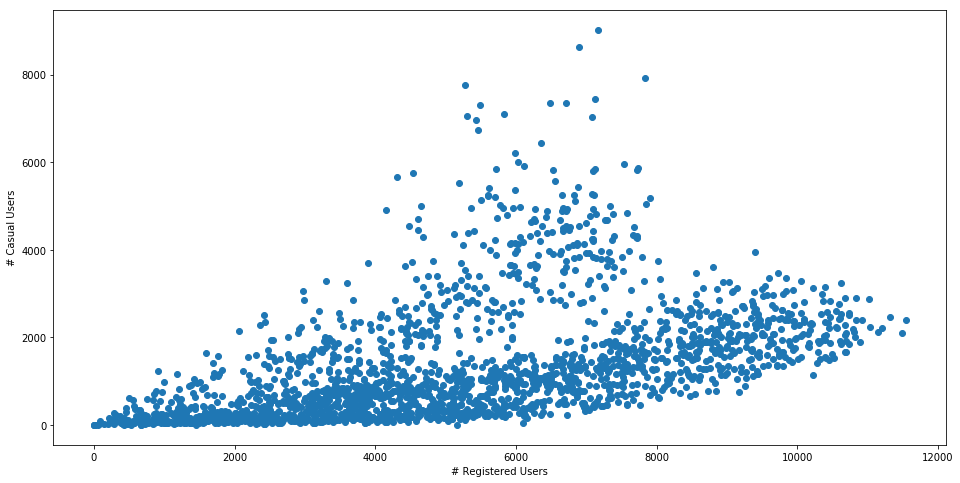

In [108]:
plt.figure(figsize = (16,8))
plt.scatter(data_day.registered, data_day.casual)
plt.ylabel("# Casual Users")
plt.xlabel("# Registered Users")
plt.savefig(path+ '/Pictures/'+'casual_vs_registered.png')
plt.show()

It seems that a lot of casual users mean a lot of registered users. The contrary is not true : there can be a lot of registered users many casual users. We cannot discard one in favor of the other.

#### Let's talk about time series data 

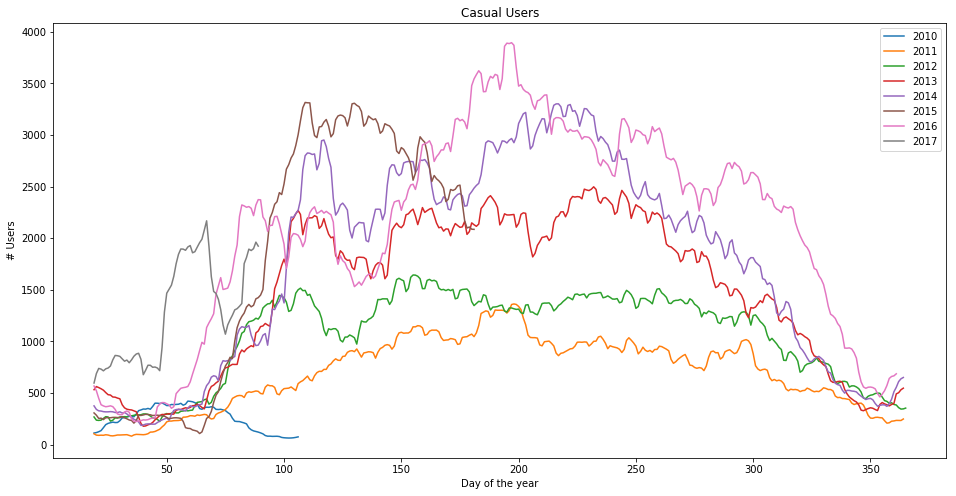

In [109]:
plt.figure(figsize =( 16, 8))

for year in pd.unique(data_day.year):
    df_temp = data_day[data_day.year==year]
    
    plt.plot(df_temp.casual.reset_index().casual.rolling(window = 20).mean())
    
plt.legend(pd.unique(data_day.year))
plt.title('Casual Users')
plt.xlabel('Day of the year')
plt.ylabel('# Users')

plt.savefig(path+ '/Pictures/'+'smoothed_time_series_casual.png')
plt.show()
# We choose to apply a centered smoothing average to see the seasonality

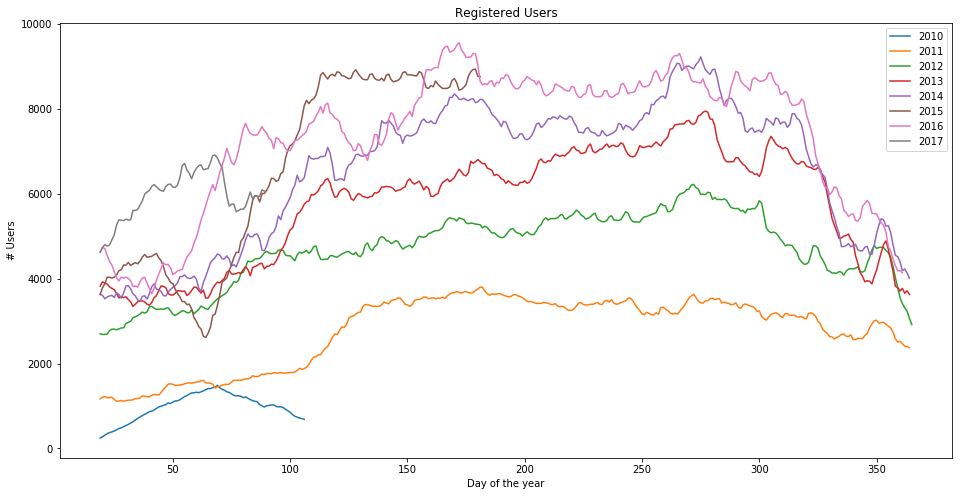

In [110]:
plt.figure(figsize =( 16, 8))

for year in pd.unique(data_day.year):
    df_temp = data_day[data_day.year==year]
    
    plt.plot(df_temp.registered.reset_index().registered.rolling(window = 20).mean())
    
plt.legend(pd.unique(data_day.year))
plt.title('Registered Users')
plt.xlabel('Day of the year')
plt.ylabel('# Users')

plt.savefig(path+ '/Pictures/'+'smoothed_time_series_registered.png')
plt.show()
# We choose to apply a centered smoothing average to see the seasonality

The effect of seasonality is less important for the registered users.

#### Do people use more bikes at the beginning or at the end of the month ? 

In [79]:
agg_month = data_day[['registered', 'casual']]
agg_month['day'] = pd.Series(agg_month.index).apply(lambda x: x.day).values
agg_month = agg_month.groupby('day').mean()

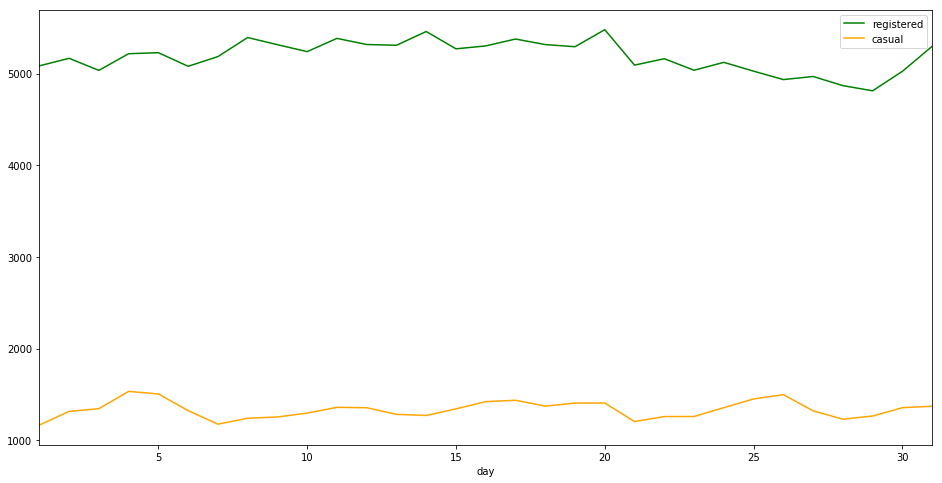

In [111]:
agg_month.plot(figsize = (16,8), color = ['green', 'orange'])

plt.savefig(path+ '/Pictures/'+'end_of_the_month_effect.png')
plt.show()

No end of the month effect 

#### Does holidays have an effect on the use of bikes ? 

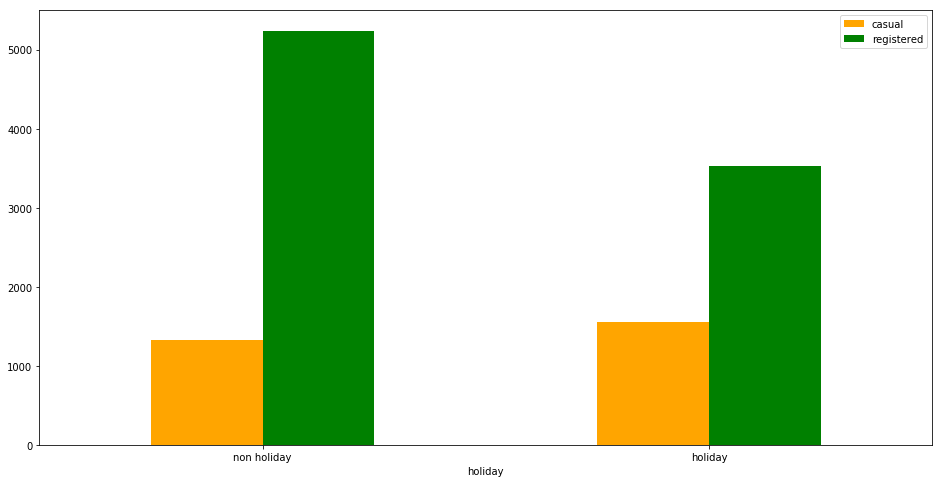

In [112]:
agg_holy = data_day[['casual', 'registered', 'holiday']].groupby('holiday').mean()
agg_holy.plot(kind = 'bar', figsize = (16,8), color = ['orange', 'green']) 
plt.xticks(range(2), ['non holiday', 'holiday'], rotation = 0)

plt.savefig(path+ '/Pictures/'+'holiday_effect.png')
plt.show()

We can see that holiday increases the number of bikes used by the casual users and does the contrary effect on registered users.
#### Can we expect similar results with working days? 

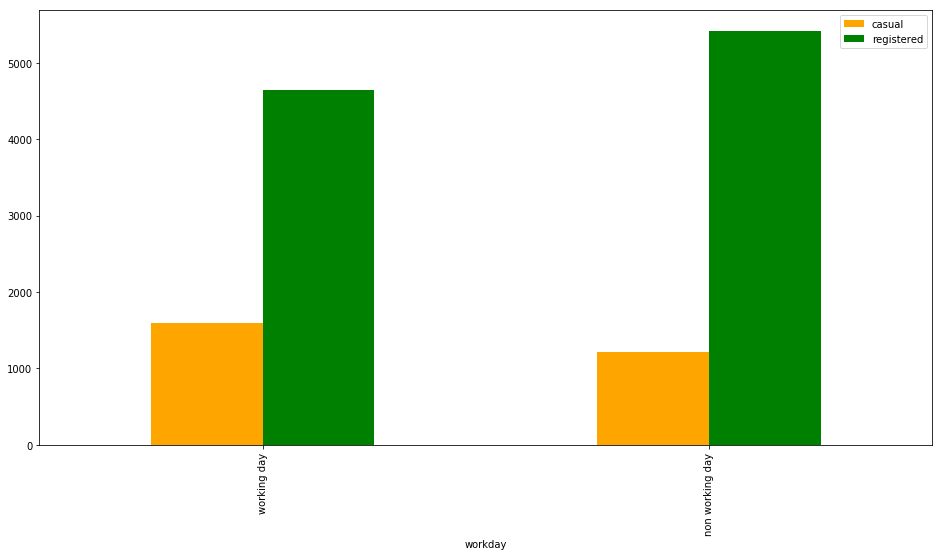

In [113]:
agg_work = data_day[['casual', 'registered', 'workday']].groupby('workday').mean()
agg_work.plot(figsize = (16,8), kind = 'bar', color = ['orange', 'green'])
plt.xticks(range(2), ['working day', 'non working day'])

plt.savefig(path+ '/Pictures/'+'workday_effect.png')
plt.show()

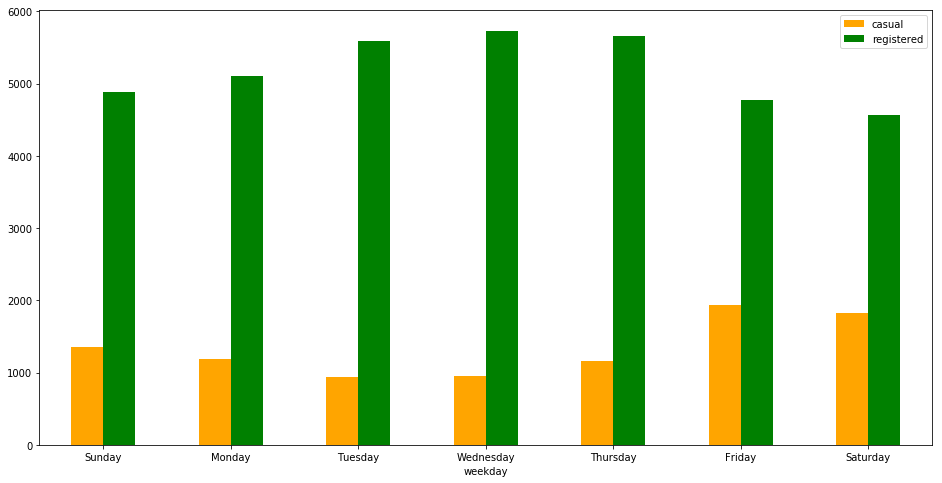

In [114]:
agg_work = data_day[['casual', 'registered', 'weekday']].groupby('weekday').mean()
agg_work.plot(figsize = (16,8), kind = 'bar', color = ['orange', 'green'])
plt.xticks(range(7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation = 0)

plt.savefig(path+ '/Pictures/'+'week_effect.png')
plt.show()

As expected, we have the same results: registered users use more bikes on working day while casual users use it on non working days

#### Let's now see the effects of weather on the number of bikes 

We can see that obviously, the worst the weather, the least people take their bike 
#### How does temperature affect the number of bikes ? 

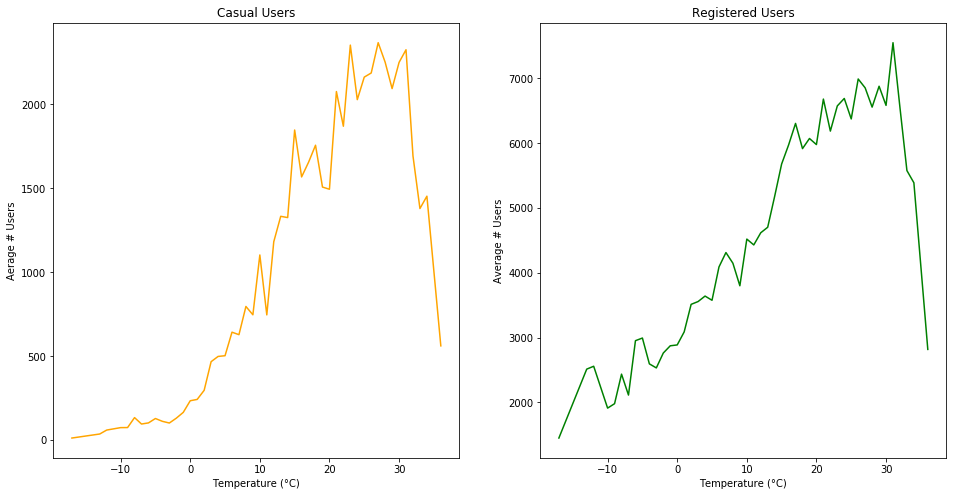

In [115]:
agg_temp = data_day[['casual', 'registered', 'avg_temp']]
agg_temp['avg_temp'] = agg_temp['avg_temp'].apply(lambda x: round(x,0))
agg_temp = agg_temp.groupby('avg_temp').mean().reset_index()

f, (ax1, ax2), agg_temp = plot_aggregated_data('avg_temp')
ax1.set_xlabel('Temperature (°C)')
ax2.set_xlabel('Temperature (°C)')

plt.savefig(path+ '/Pictures/'+'temperature_effect.png')
plt.show()

The hotter the more users. This seems a more important effect for casual users 

#### What about the feeling temp?

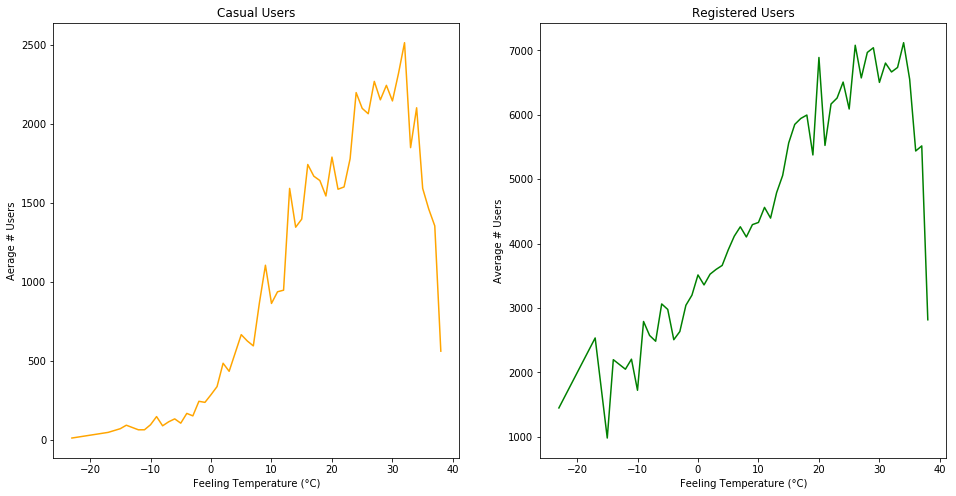

In [116]:
agg_atemp = data_day[['casual', 'registered', 'atemp']]
agg_atemp['atemp'] = agg_atemp['atemp'].apply(lambda x: round(x,0))
agg_atemp = agg_atemp.groupby('atemp').mean().reset_index()

f, (ax1, ax2), agg_atemp = plot_aggregated_data('atemp')
ax1.set_xlabel('Feeling Temperature (°C)')
ax2.set_xlabel('Feeling Temperature (°C)')

plt.savefig(path+ '/Pictures/'+'apparent_temperature_effect.png')
plt.show()

Seems the same as before... Maybe Temperature is too correlated to Feeling Temperature... Let's see

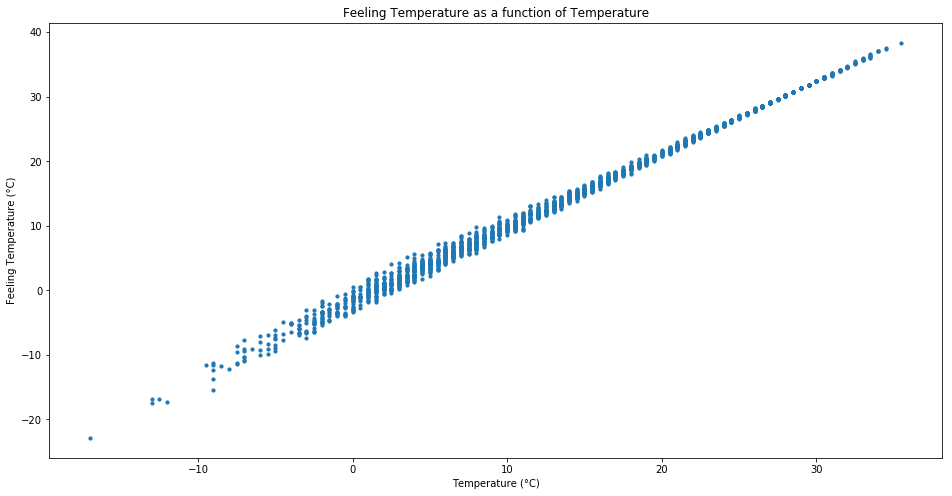

In [117]:
plt.figure(figsize=(16,8))
plt.scatter(data_day.avg_temp, data_day.atemp, s = 10)
plt.title('Feeling Temperature as a function of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Feeling Temperature (°C)')

plt.savefig(path+ '/Pictures/'+'apparent_temperature_vs_measured.png')
plt.show()

Obviously they are very correlated<br>
From the meta data that we have, we know that Tmin = -8°C, Tmax = 39°C, aTmin = -16 and aTmax = 50°C

Let's plot the number of users as a function of the feeling temperature

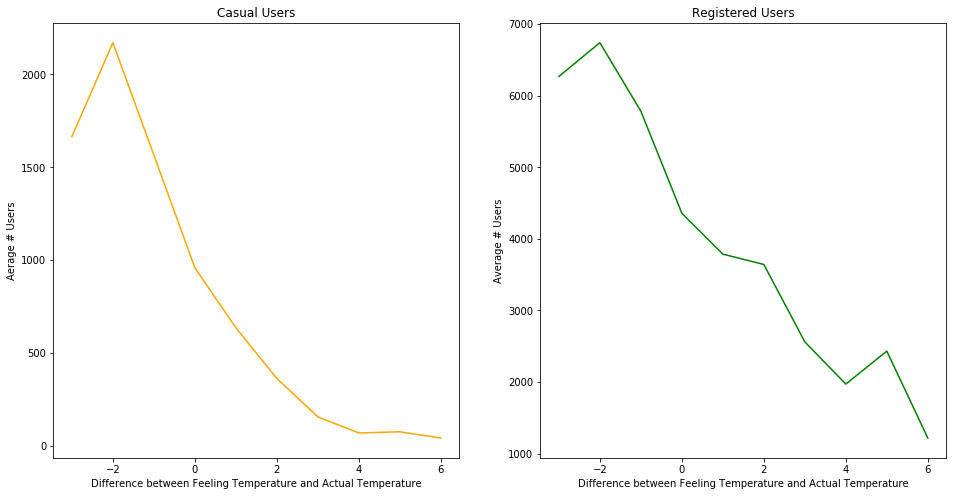

In [118]:
data_day['temp_diff'] = data_day['avg_temp'] - data_day['atemp']

f, (ax1, ax2), agg_diff_temp = plot_aggregated_data('temp_diff')
ax1.set_xlabel('Difference between Feeling Temperature and Actual Temperature')
ax2.set_xlabel('Difference between Feeling Temperature and Actual Temperature')

plt.savefig(path+ '/Pictures/'+'feeling_difference_effect.png')
plt.show()

#### What about the wind speed ? 

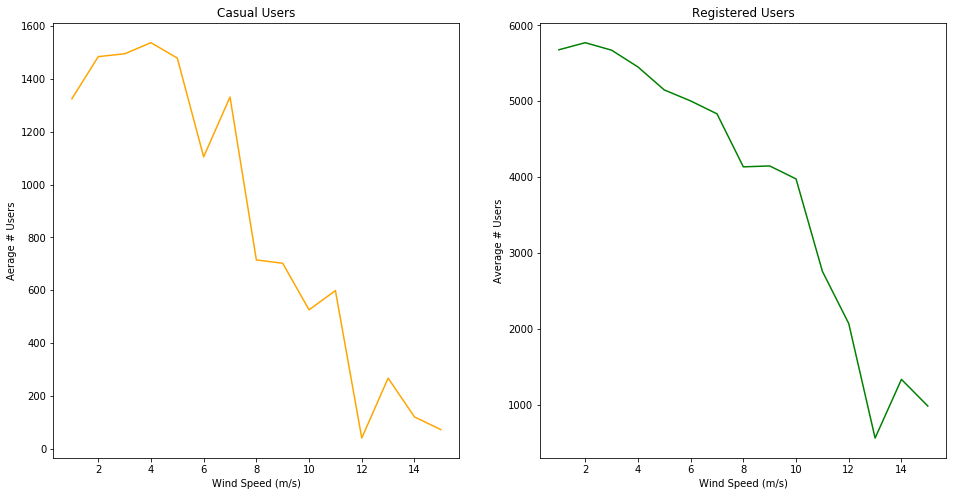

In [119]:
f, (ax1, ax2), agg_wind_speed = plot_aggregated_data('wind_speed')
ax1.set_xlabel('Wind Speed (m/s)')
ax2.set_xlabel('Wind Speed (m/s)')

plt.savefig(path+ '/Pictures/'+'wind_speed_effect.png')
plt.show()

It's not very clear whether or not there is a relationship between the number of users and the number of users

#### Let's look at the humidity

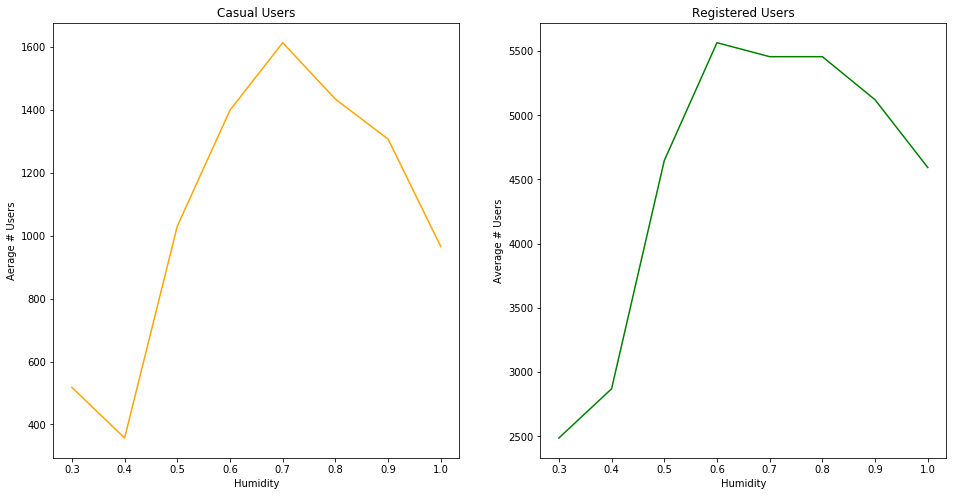

In [120]:
f, (ax1, ax2), agg_hum = plot_aggregated_data('hum', n_dec=1)
ax1.set_xlabel('Humidity')
ax2.set_xlabel('Humidity')

plt.savefig(path+ '/Pictures/'+'humidity_effect.png')
plt.show()

Once again the relationship is unclear

#### Let's investigate the clouds 

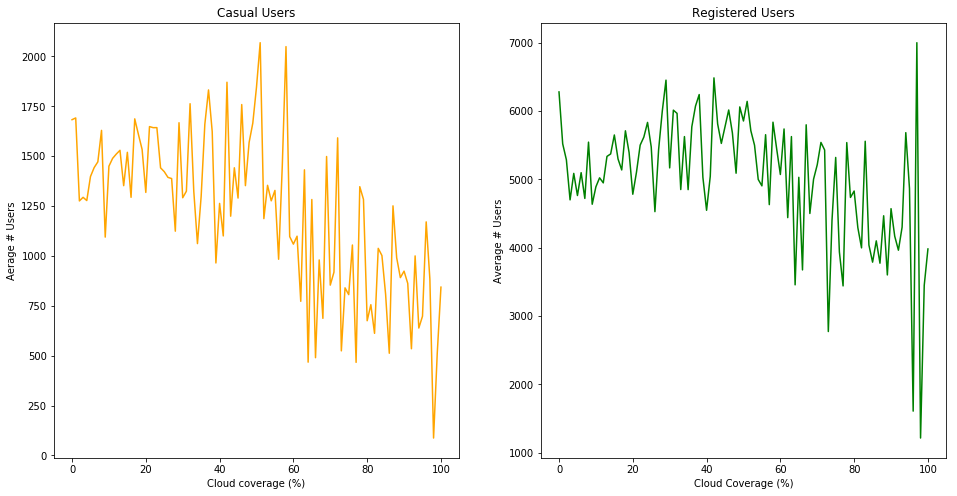

In [121]:
f, (ax1, ax2), agg_cloud = plot_aggregated_data('clouds', n_dec=0)
ax1.set_xlabel('Cloud coverage (%)')
ax2.set_xlabel('Cloud Coverage (%)')

plt.savefig(path+ '/Pictures/'+'clouds_effect.png')
plt.show()

No real effect on 